In [1]:
'''
In this lab, we'll analyze the lb / unit ratio for different products.
We want to look for any outliers in the data, where shipments are abnormally heavy or light.
'''

"\nIn this lab, we'll analyze the lb / unit ratio for different products.\nWe want to look for any outliers in the data, where shipments are abnormally heavy or light.\n"

In [2]:
### Loading in libraries

import pandas as pd
import numpy as np

In [3]:
'''
a) There is a file called 'Supply chain logisitcs problem.xlsx'. 
Read in the file as a datafrane and store it into a variable called "orders"
'''

orders = pd.read_excel('Supply chain logisitcs problem.xlsx')

In [4]:
'''
b) Next, we'll create a column for the lb / unit ratio for each product. Create this column in the orders dataframe
and call it 'lb/unit_ratio'.
'''

orders['lb/unit_ratio'] = orders['Weight'] / orders['Unit quantity']

In [5]:
'''
c) Next, we need to get the mean lb / unit ratio for each product. For easy comparision, broadcast this result back into
the original 'orders' dataframe. Your new column in the orders dataframe should be called 'avg_product_lb/unit_ratio'.
Hint: There are multiple ways to do this, but the easiest is with the transform method.
'''

orders['avg_product_lb/unit_ratio'] = orders.groupby('Product ID')['lb/unit_ratio'].transform('mean')

In [6]:
'''
d) To look for outliers, let's analyze the squared difference between the 'lb/unit_ratio' and 'avg_product_lb/unit_ratio' columns within each row.
Create a new column in the orders dataframe called 'lb/unit_squared_diff' with the stored result.
Hint: Use the np.square() function.
'''

orders['lb/unit_squared_diff'] = np.square(orders['lb/unit_ratio'] - orders['avg_product_lb/unit_ratio'])

In [7]:
'''
e) Let's sort the orders by our new 'lb/unit_squared_diff' columns.
Create a new dataframe called 'outliers' to store the 10 orders with the highest lb/unit
deviations from the product mean.
Hint: Pay attention to the 'ascending keyword' if using the sort_values function.
'''

outliers = orders.sort_values(by = ['lb/unit_squared_diff'], ascending = False).head(10)

<AxesSubplot:>

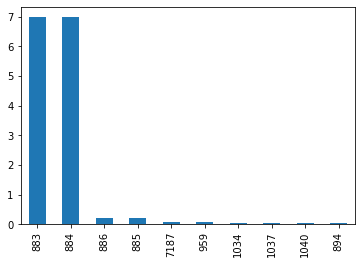

In [8]:
'''
f) Extra Credit: Let's plot our outliers in a bar chart. The y-axis should be our new 'lb/unit_squared_diff' column.
The x-axis can be the default index.
'''

outliers['lb/unit_squared_diff'].plot(kind = 'bar')